# Task A: Data Transformation

1.     Load the dataset into a DataFrame.
1.     Show the first few rows of the loaded dataset.
1.     Apply three (3) operations to handle missing values in a dataset.
1.     Choose a column and perform the sorting technique.
1.     Define a condition to filter transactions from the dataset.
1.     Create a new column to derive additional information.
1.     Choose the categorical column and aggregate data based on it.

# Loading the dataset:

    Use Python's pandas library to load the dataset into a DataFrame

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/salesdata/sales_transactions.csv')

# Showing the first few rows:

In [7]:
print(df.head())


   TransactionID  CustomerID  ProductID ProductCategory TransactionDate  \
0              1         101       1001      Smartphone      2024-01-01   
1              2         102       1002          Laptop      2024-01-02   
2              3         103       1003          Tablet      2024-01-03   
3              4         104       1004      Smartwatch      2024-01-04   
4              5         105       1005      Headphones      2024-01-05   

  SalesChannel  Quantity  UnitPrice  TotalPrice  
0       Online         1        500         500  
1        Store         1       1000        1000  
2       Online         2        300         600  
3        Store         1        200         200  
4       Online         3        100         300  


# Handling missing values

In [19]:
# Handling missing values by filling them with the mean of the column
df['TotalPrice'] = df['TotalPrice'].fillna(df['TotalPrice'].mean())
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())
df['UnitPrice'] = df['UnitPrice'].fillna(df['UnitPrice'].mean())

# Verify that there are no more missing values
print(df.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
ProductCategory    0
TransactionDate    0
SalesChannel       0
Quantity           0
UnitPrice          0
TotalPrice         0
DiscountedPrice    0
dtype: int64


# Sorting a column:

In [9]:
filtered_df = df[df['SalesChannel'] == 'Online']


# Filtering transactions:

In [10]:
filtered_df = df[df['SalesChannel'] == 'Online']


# Creating a new column:

In [11]:
df['DiscountedPrice'] = df['TotalPrice'] * 0.9  # Assuming a 10% discount on all transactions


# Aggregating data based on a categorical column:

In [12]:
aggregated_data = df.groupby('ProductCategory').agg({'TotalPrice': 'sum', 'Quantity': 'sum'})


# **Task B: Data Analysis**

1.     Group the dataset based on a categorical variable and calculate summary statistics.
1.     Investigate the correlations between different variables in the dataset.
1.     Export the dataset to a CSV file.
1.     Perform data analysis and visualization to derive insights.
1.     Apply inferential statistical methods to quantify the relationships between variables.

# Group the dataset based on a categorical variable and calculate summary statistics

*Group by ProductCategory and calculate summary statistics for TotalPrice and Quantity:*

In [13]:
grouped = df.groupby('ProductCategory').agg({
    'TotalPrice': ['sum', 'mean', 'std'],
    'Quantity': ['sum', 'mean', 'std']
})

print(grouped)


                TotalPrice              Quantity          
                       sum    mean  std      sum mean  std
ProductCategory                                           
Headphones             600   300.0  0.0        6  3.0  0.0
Laptop                2000  1000.0  0.0        2  1.0  0.0
Smartphone            1000   500.0  0.0        2  1.0  0.0
Smartwatch             400   200.0  0.0        2  1.0  0.0
Tablet                1200   600.0  0.0        4  2.0  0.0


# Investigate the correlations between different variables in the dataset

*Calculate the correlation matrix and plot a heatmap:*

                 TransactionID  CustomerID  ProductID  Quantity  UnitPrice  \
TransactionID         1.000000    1.000000   1.000000  0.348155  -0.349523   
CustomerID            1.000000    1.000000   1.000000  0.348155  -0.349523   
ProductID             1.000000    1.000000   1.000000  0.348155  -0.349523   
Quantity              0.348155    0.348155   0.348155  1.000000  -0.596083   
UnitPrice            -0.349523   -0.349523  -0.349523 -0.596083   1.000000   
TotalPrice           -0.299953   -0.299953  -0.299953 -0.323081   0.918994   
DiscountedPrice      -0.299953   -0.299953  -0.299953 -0.323081   0.918994   

                 TotalPrice  DiscountedPrice  
TransactionID     -0.299953        -0.299953  
CustomerID        -0.299953        -0.299953  
ProductID         -0.299953        -0.299953  
Quantity          -0.323081        -0.323081  
UnitPrice          0.918994         0.918994  
TotalPrice         1.000000         1.000000  
DiscountedPrice    1.000000         1.000000  

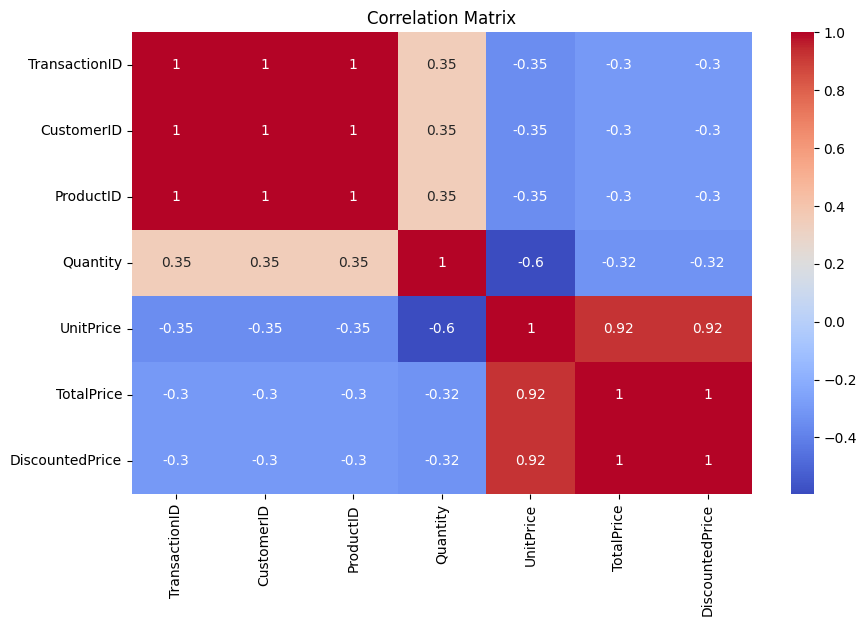

In [15]:
# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Export the dataset to a CSV file

In [16]:
df.to_csv('exported_sales_transactions.csv', index=False)
print("Exported dataset to 'exported_sales_transactions.csv'")


Exported dataset to 'exported_sales_transactions.csv'


# Perform data analysis and visualization to derive insights

*Create visualizations for insights, such as the distribution of TotalPrice and Quantity by ProductCategory and SalesChannel*:

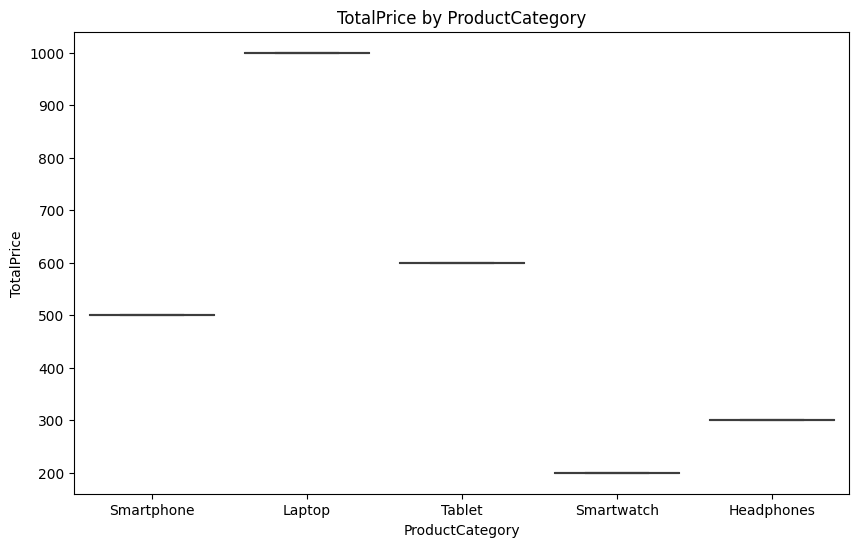

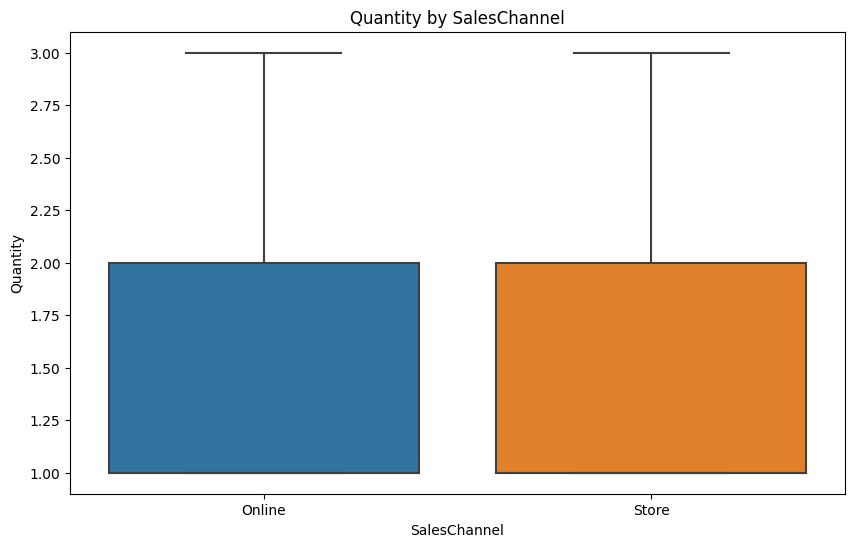

In [17]:
# TotalPrice by ProductCategory
plt.figure(figsize=(10, 6))
sns.boxplot(x='ProductCategory', y='TotalPrice', data=df)
plt.title('TotalPrice by ProductCategory')
plt.show()

# Quantity by SalesChannel
plt.figure(figsize=(10, 6))
sns.boxplot(x='SalesChannel', y='Quantity', data=df)
plt.title('Quantity by SalesChannel')
plt.show()


# Apply inferential statistical methods to quantify the relationships between variables

*Perform an inferential statistical test, such as a t-test to compare TotalPrice between SalesChannels:*

In [18]:
from scipy.stats import ttest_ind

# Separate data for Online and Store channels
online_sales = df[df['SalesChannel'] == 'Online']['TotalPrice']
store_sales = df[df['SalesChannel'] == 'Store']['TotalPrice']

# Perform t-test
t_stat, p_value = ttest_ind(online_sales, store_sales)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 0.0, P-value: 1.0
